In [69]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

In [60]:
os.chdir('/Users/lillykirby/Documents/School/Network Science') #Replace this with YOUR directory.

#Load patent continuity data:
df = pd.read_excel('Related Patents.xlsx', sheet_name='Related Patents')

#Clean and split column values:
def clean_and_split(column_value):
    if pd.notna(column_value):
        #Split by ", ", remove "ip", and strip whitespace
        return [item.replace("ip", "").strip() for item in str(column_value).split(", ")]
    return []

#Initialize edge list:
edges = []

#Define parent patents that point to "patent_number":
#Direction: originating -> patent_number
originating_columns = ['parent patent', 'reissue of', 'continuation of']
for column in originating_columns:
    if column in df.columns:
        for idx, row in df.iterrows():
            originating_values = clean_and_split(row[column])
            for value in originating_values:
                edges.append((value, row['patent_number']))  

#Define child patents that are pointed to by "patent_number":
#Direction: patent_number -> child
child_columns = ['continued in', 'reissued as', 'division child']
for column in child_columns:
    if column in df.columns:
        for idx, row in df.iterrows():
            child_values = clean_and_split(row[column])
            for value in child_values:
                edges.append((row['patent_number'], value))

#Create directed graph:
G = nx.DiGraph()
G.add_edges_from(edges)

#Ensure all nodes are added (including isolated ones):
all_nodes = set(df['patent_number'].dropna().unique())
for column in originating_columns + child_columns:
    if column in df.columns:
        for values in df[column].dropna():
            all_nodes.update(clean_and_split(values))

#Add all nodes to the graph:
G.add_nodes_from(all_nodes)

print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")

isolated_nodes = list(nx.isolates(G))
print(f"Number of isolated nodes: {len(isolated_nodes)}")
print(f"Isolated nodes: {isolated_nodes}")


Number of nodes in the graph: 1794
Number of edges in the graph: 1668
Number of isolated nodes: 262
Isolated nodes: [3432489, 10584124, 5931089, 4661493, 6693115, 8052987, 8052995, 6455557, 9511198, 11141413, 3965257, 5710183, 5710285, 3932645, 8569325, 4833790, 8790641, 9814721, 5677794, 4915950, 4866812, 10117909, 5612315, 6062927, 6677358, 4940731, 5817340, 8324157, 7144577, 5104888, 6194429, 6030643, 6251895, 5629305, 9577864, 4138415, 5760485, 4285957, 5752363, 5514826, 3483221, 6235781, 4425363, 4507323, 5375693, 5498598, 7915243, 7022340, 3934032, 6342515, 4409212, 4917120, 10029011, 3966949, 7235576, 6162463, 5580880, 9717852, 5736541, 4089969, 4393078, 6776982, 5441738, 7989474, 9750762, 4057323, 6703408, 9169213, 6187341, 3565924, '11638711', 5917054, 4753802, 7727552, 8882721, 6244905, 5466700, 8227409, 6113920, 4590213, 5196438, 4647591, 5696172, 8161968, 10357468, 6261546, 4459310, 5925760, 3927002, 5843984, 6294548, 8113199, 8039474, 4721723, '7866474', 9981013, 5393529, 

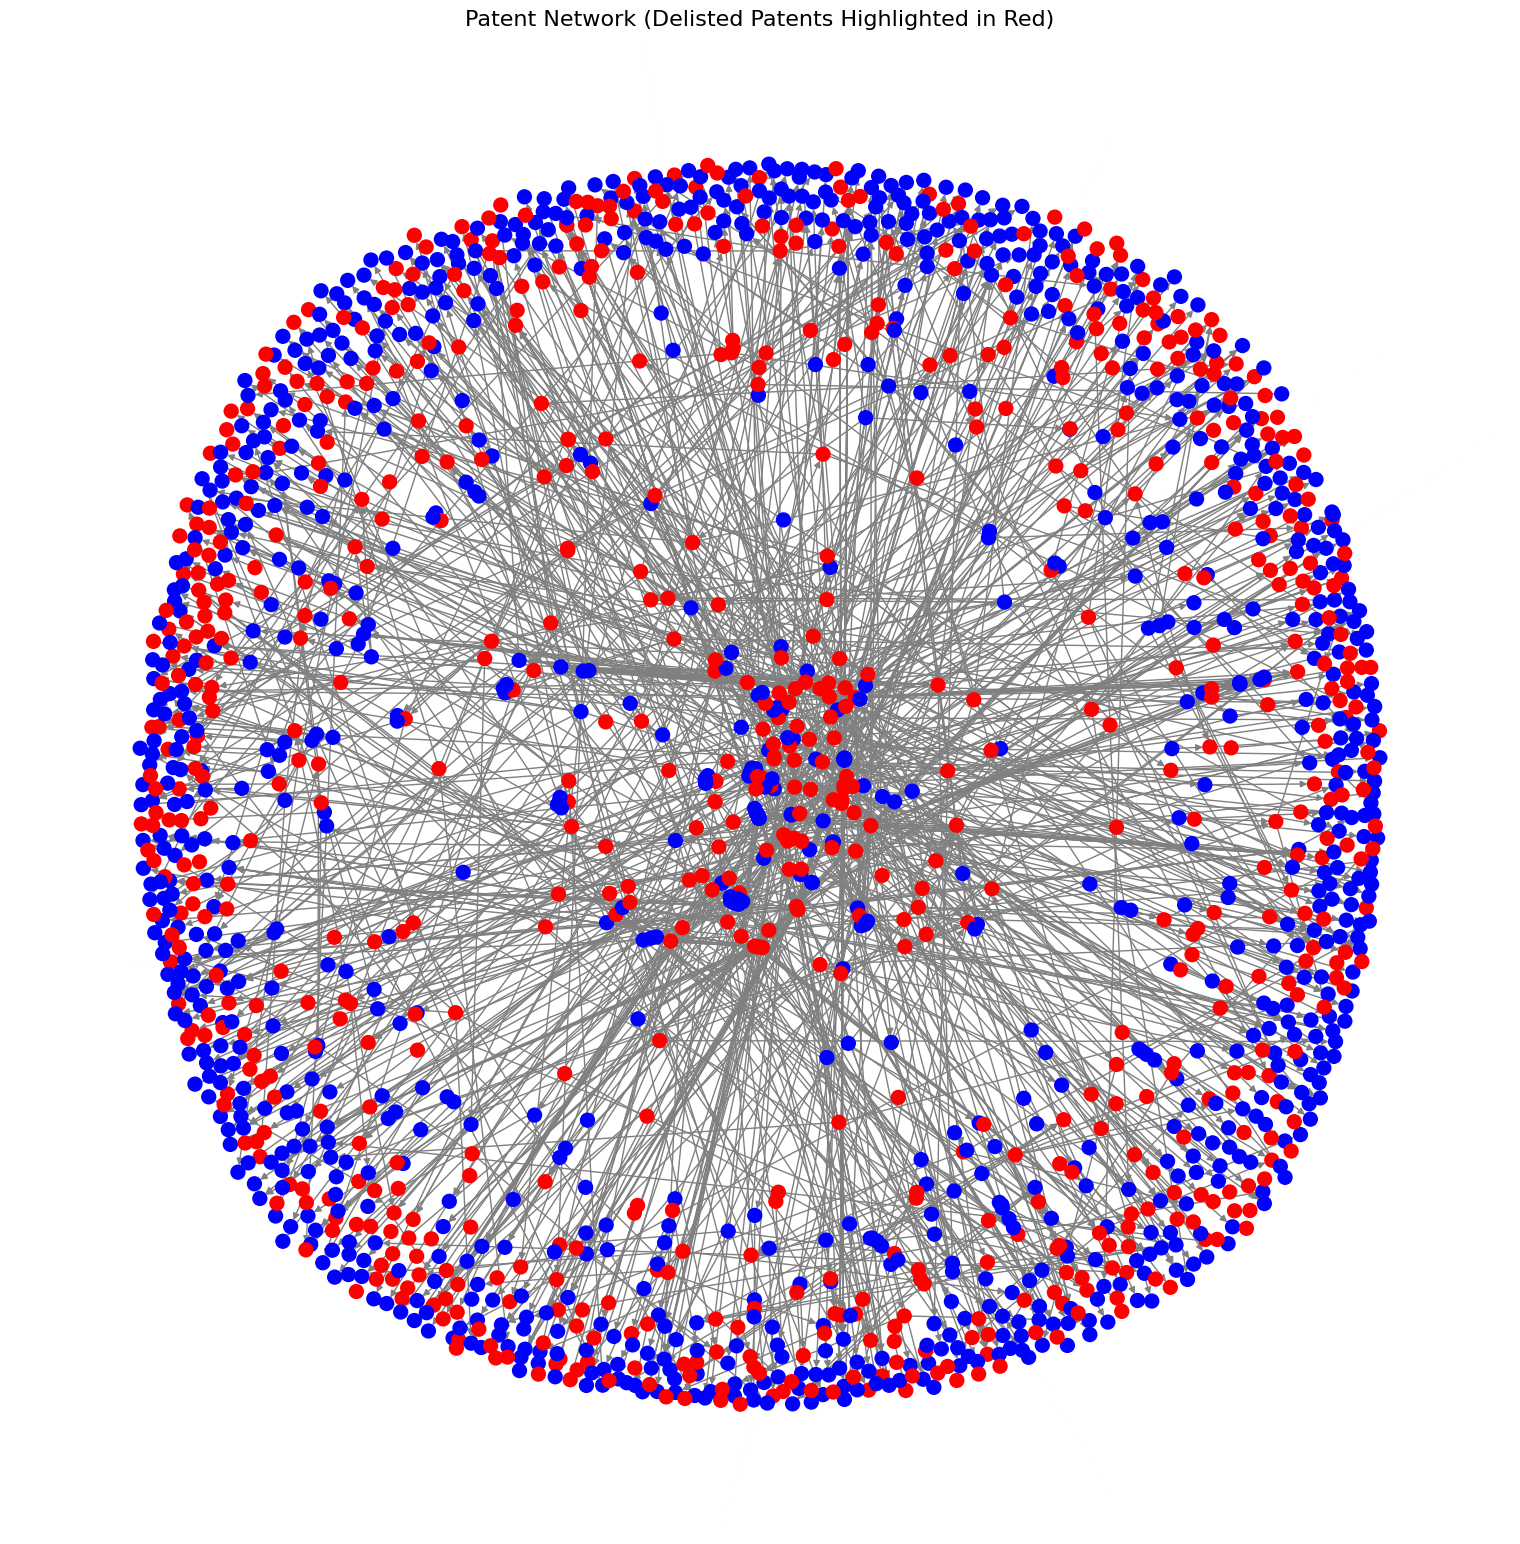

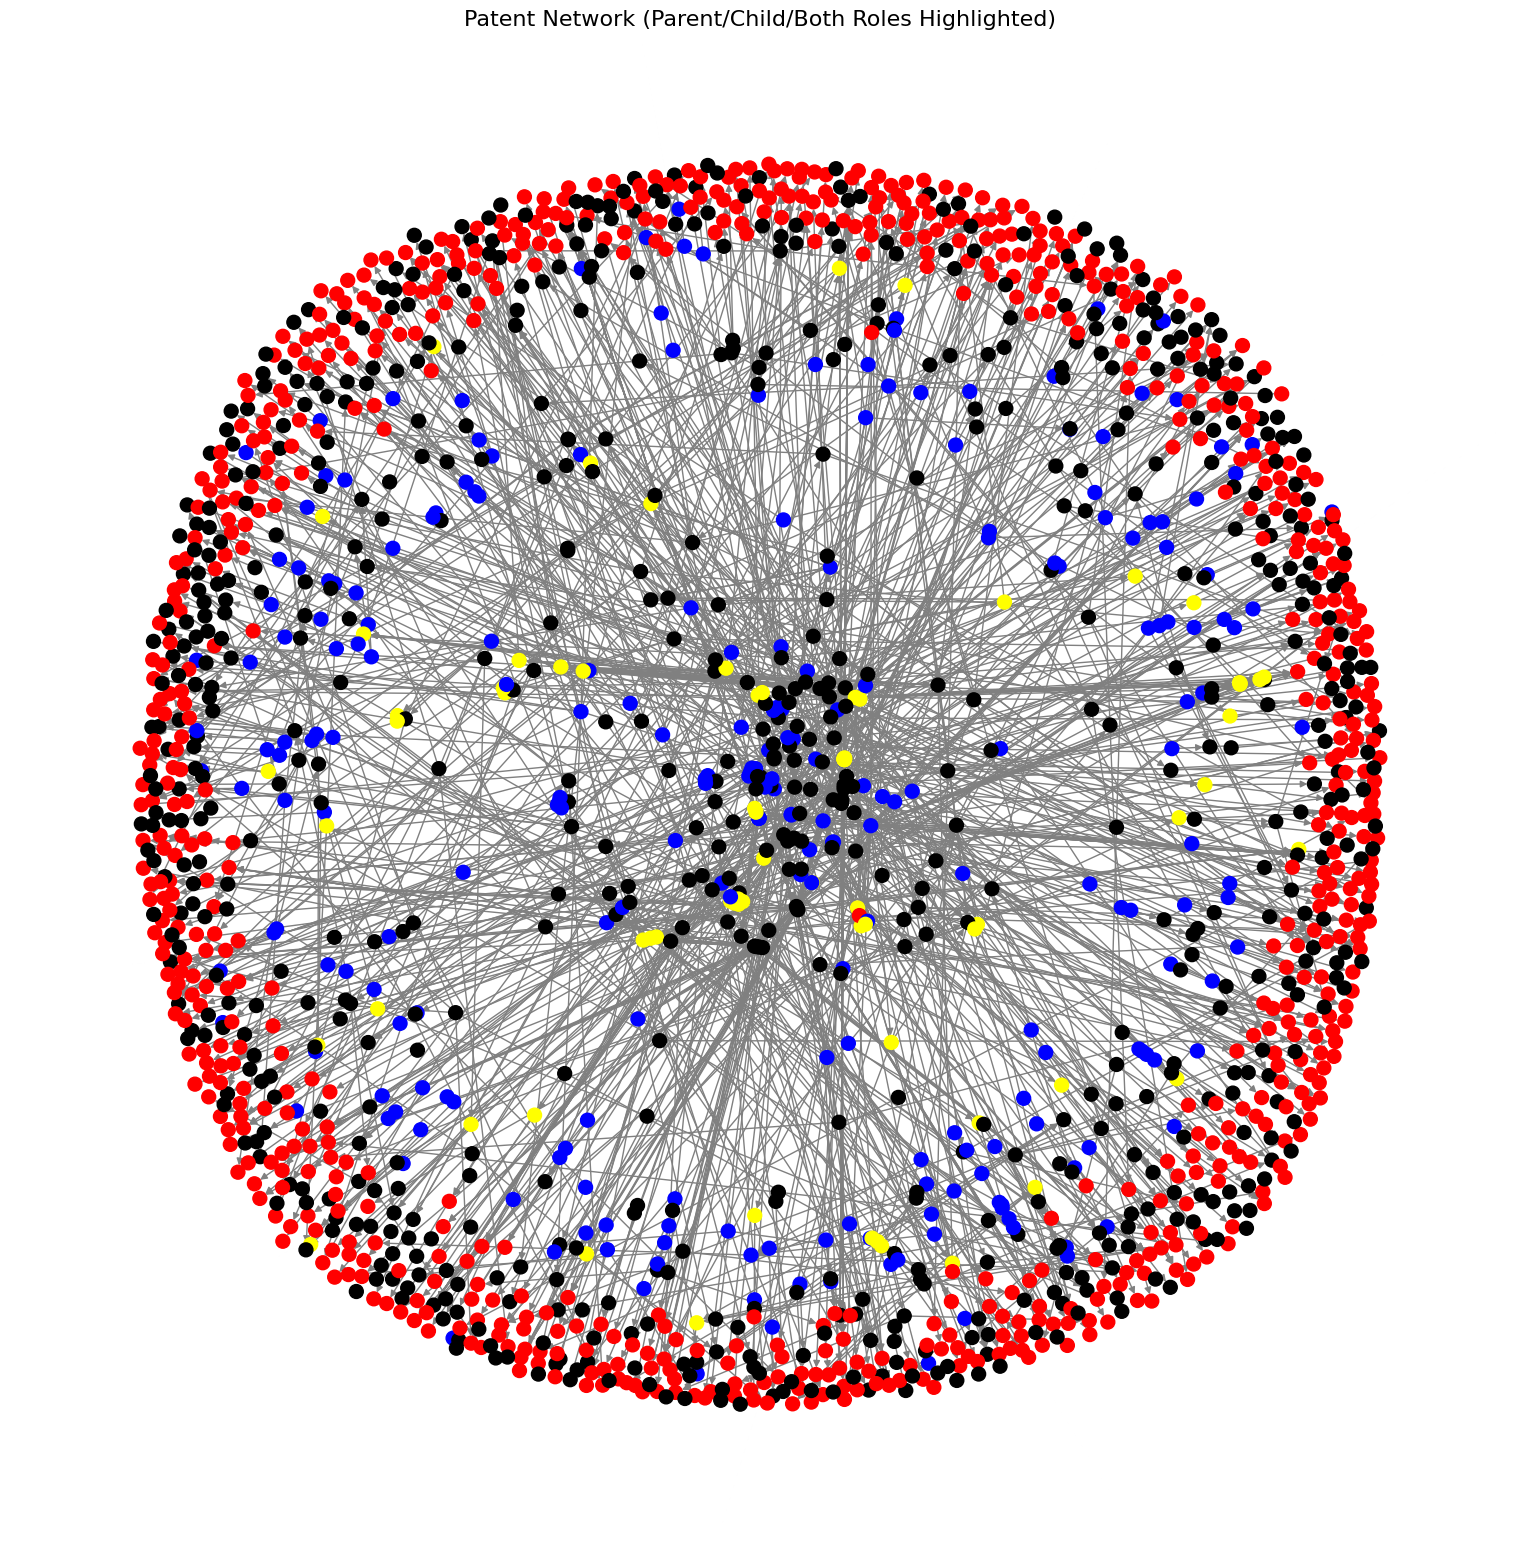

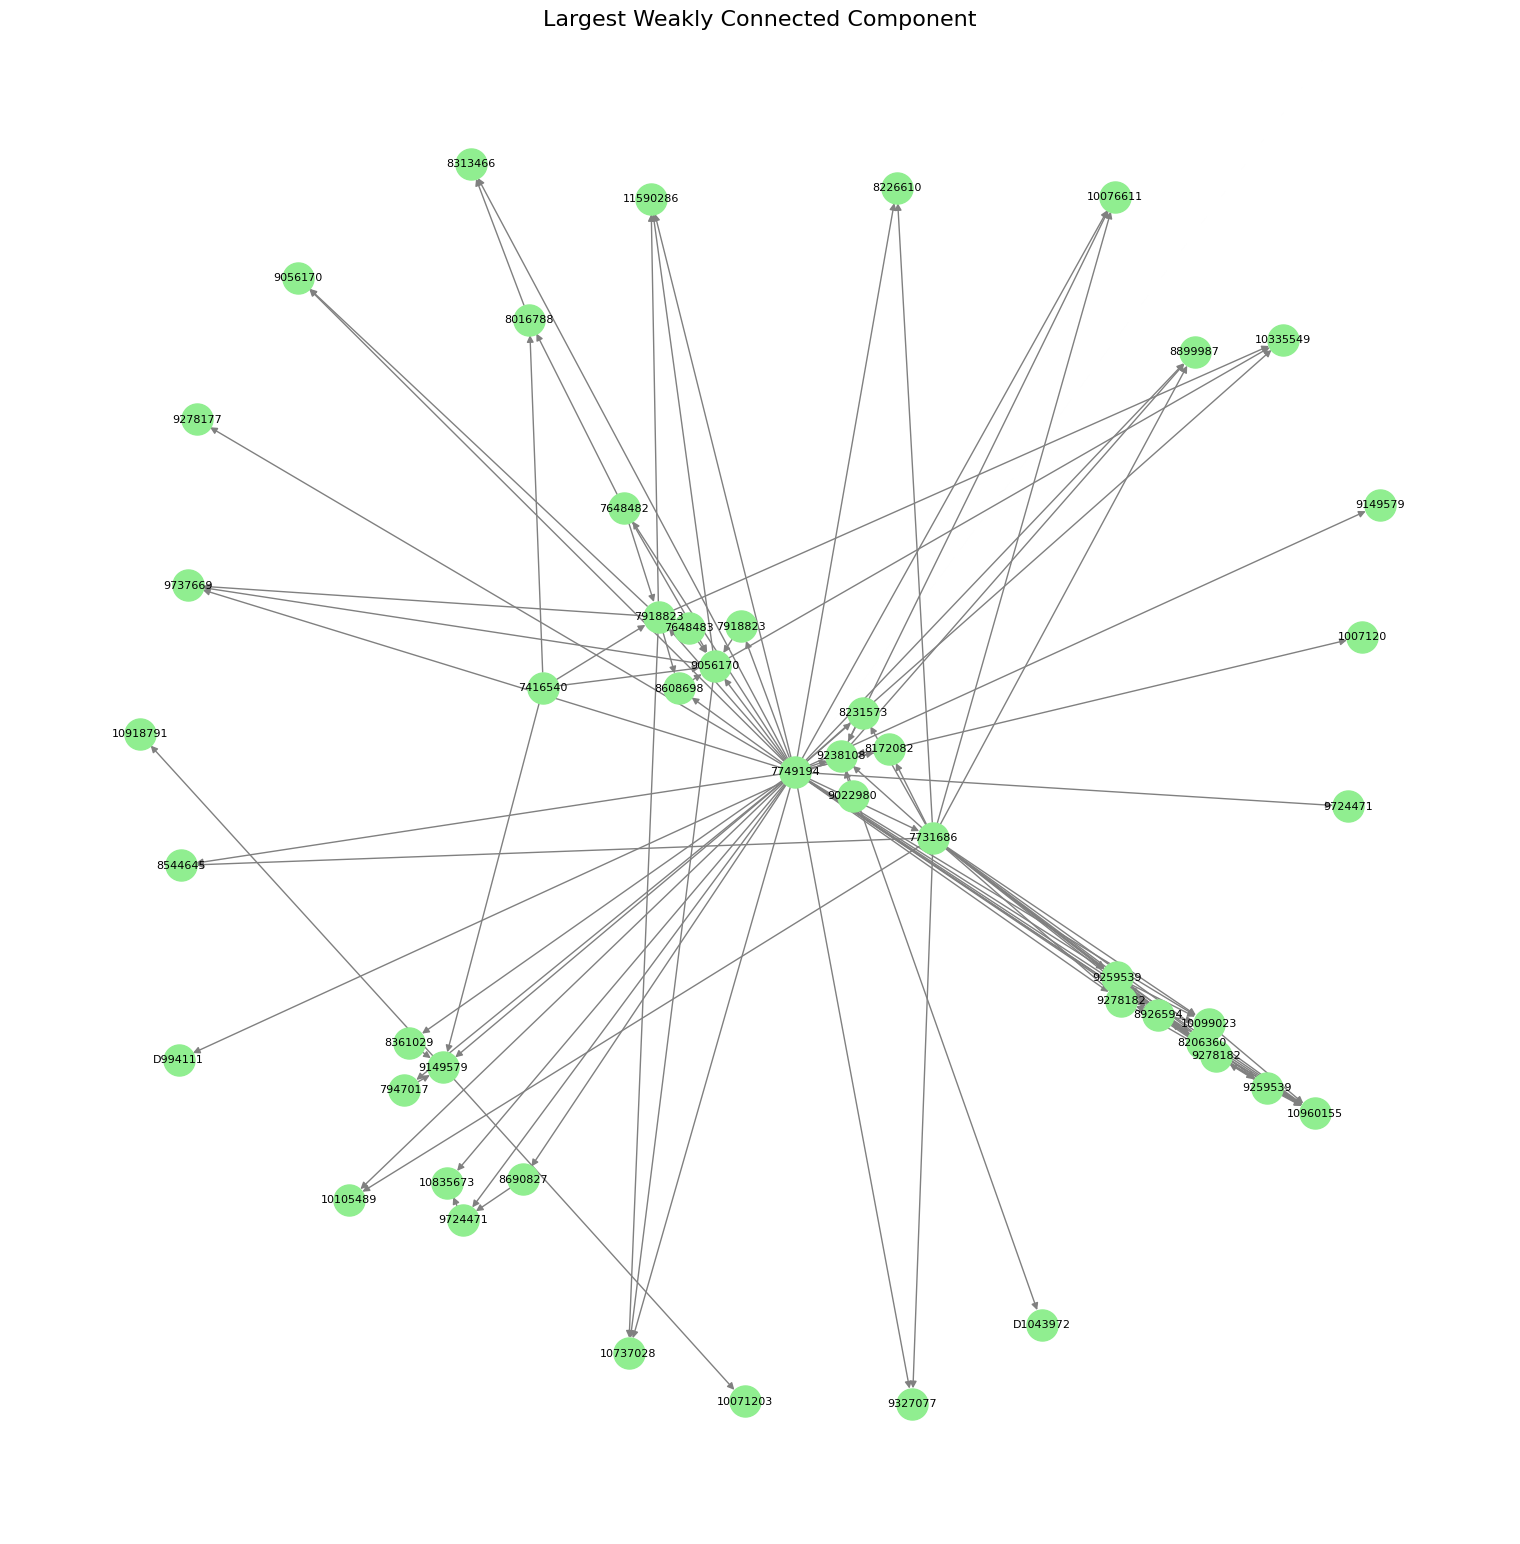

In [61]:
#Highlight delisted patents:
delisted_patents = set(df['patent_number'].dropna().unique())

#Define colors for delisted and non-delisted patents:
delisted_colors = []
for node in G.nodes:
    if node in delisted_patents:
        delisted_colors.append("red")
    else:
        delisted_colors.append("blue")

# Visualize the graph with delisted patents highlighted:
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G,
    pos,
    with_labels=False,
    node_size=100,
    node_color=delisted_colors,
    edge_color="gray",
)
plt.title("Patent Network (Delisted Patents Highlighted in Red)", fontsize=16)
plt.show()

# Define colors for parent, child, and both roles:
node_colors_parent_child = []
for node in G.nodes:
    if node in both_nodes:
        node_colors_parent_child.append("yellow")  #Both parent and child
    elif node in parent_nodes:
        node_colors_parent_child.append("blue")  #Parent only
    elif node in child_nodes:
        node_colors_parent_child.append("red")  #Child only
    else:
        node_colors_parent_child.append("black")  #Neither

#Visualize the network with Parent/Child/Both roles:
plt.figure(figsize=(15, 15))
pos_parent_child = nx.spring_layout(G, seed=42)
nx.draw(
    G,
    pos_parent_child,
    with_labels=False, 
    node_size=100,       
    node_color=node_colors_parent_child,
    edge_color="gray",
)
plt.title("Patent Network (Parent/Child/Both Roles Highlighted)", fontsize=16)
plt.show()

#Find the largest weakly connected component:
largest_wcc = max(nx.weakly_connected_components(G), key=len)

#Create a subgraph for the largest WCC:
subgraph_wcc = G.subgraph(largest_wcc)

#Visualize the largest WCC:
plt.figure(figsize=(15, 15))
pos_wcc = nx.spring_layout(subgraph_wcc, seed=42)
nx.draw(
    subgraph_wcc,
    pos_wcc,
    with_labels=True,
    node_size=500,
    font_size=8,
    node_color="lightgreen",
    edge_color="gray",
)
plt.title("Largest Weakly Connected Component", fontsize=16)
plt.show()

In [62]:
#Get the top 10 nodes for each centrality measure
top_10_degree = centrality_df.sort_values(by="Degree Centrality", ascending=False).head(10)
top_10_betweenness = centrality_df.sort_values(by="Betweenness Centrality", ascending=False).head(10)
top_10_closeness = centrality_df.sort_values(by="Closeness Centrality", ascending=False).head(10)
top_10_eigenvector = centrality_df.sort_values(by="Eigenvector Centrality", ascending=False).head(10)

print("Top 10 Nodes by Degree Centrality:")
for _, row in top_10_degree.iterrows():
    print(f"Node: {row['Node']}, {row['Degree Centrality']:.5f}")

print("\nTop 10 Nodes by Betweenness Centrality:")
for _, row in top_10_betweenness.iterrows():
    print(f"Node: {row['Node']}, {row['Betweenness Centrality']:.5f}")

print("\nTop 10 Nodes by Closeness Centrality:")
for _, row in top_10_closeness.iterrows():
    print(f"Node: {row['Node']}, {row['Closeness Centrality']:.5f}")

print("\nTop 10 Nodes by Eigenvector Centrality:")
for _, row in top_10_eigenvector.iterrows():
    print(f"Node: {row['Node']}, {row['Eigenvector Centrality']:.5f}")

Top 10 Nodes by Degree Centrality:
Node: 7749194, 0.02119
Node: 9060940, 0.01171
Node: 9545434, 0.01171
Node: 9056052, 0.01171
Node: 9023401, 0.01171
Node: 9289391, 0.01004
Node: 7731686, 0.01004
Node: 6582728, 0.00948
Node: 6750226, 0.00892
Node: 7767429, 0.00892

Top 10 Nodes by Betweenness Centrality:
Node: 9056052, 0.00001
Node: 9060940, 0.00001
Node: 9023401, 0.00001
Node: 9289391, 0.00001
Node: 8926953, 0.00001
Node: 9662335, 0.00001
Node: 9006462, 0.00001
Node: 9522152, 0.00000
Node: 8557285, 0.00000
Node: 6582728, 0.00000

Top 10 Nodes by Closeness Centrality:
Node: 9572804, 0.00643
Node: 9566290, 0.00607
Node: 9198863, 0.00574
Node: 9205056, 0.00554
Node: 9289391, 0.00554
Node: 9572823, 0.00535
Node: 9056052, 0.00507
Node: 10960155, 0.00502
Node: 9682077, 0.00483
Node: 9504681, 0.00483

Top 10 Nodes by Eigenvector Centrality:
Node: 10960155, 0.96672
Node: 9572804, 0.08877
Node: 10022368, 0.08877
Node: 9504681, 0.08877
Node: 9526724, 0.08877
Node: 9572805, 0.08877
Node: 9682077

In [64]:
#Calculate the density of the directed graph:
density = nx.density(G)
print(f"Graph Density (Average Level of Connectedness): {density:.4f}")

#Calculate the average degree;
total_degree = sum(dict(G.degree()).values())
num_nodes = G.number_of_nodes()
average_degree = total_degree / num_nodes if num_nodes > 0 else 0
print(f"Average Degree of the Graph: {average_degree:.4f}")

#Calculate the density of the largest weakly connected component:
largest_wcc = max(nx.weakly_connected_components(G), key=len)
subgraph_weak = G.subgraph(largest_wcc)
wcc_density = nx.density(subgraph_weak)
print(f"Density of the Largest Weakly Connected Component: {wcc_density:.4f}")

#Calculate the average degree for the largest weakly connected component:
total_degree_wcc = sum(dict(subgraph_weak.degree()).values())
num_nodes_wcc = subgraph_weak.number_of_nodes()
average_degree_wcc = total_degree_wcc / num_nodes_wcc if num_nodes_wcc > 0 else 0

print(f"Average Degree of the Largest Weakly Connected Component: {average_degree_wcc:.4f}")

Graph Density (Average Level of Connectedness): 0.0005
Average Degree of the Graph: 1.8595
Density of the Largest Weakly Connected Component: 0.0483
Average Degree of the Largest Weakly Connected Component: 4.5417


In [66]:
#Strongly connected components:
strongly_connected_components = list(nx.strongly_connected_components(G))

#Weakly connected components:
weakly_connected_components = list(nx.weakly_connected_components(G))

#Number of components:
num_strongly_connected_components = len(strongly_connected_components)
num_weakly_connected_components = len(weakly_connected_components)

print(f"Number of Strongly Connected Components: {num_strongly_connected_components}")
print(f"Number of Weakly Connected Components: {num_weakly_connected_components}")

print("Strongly Connected Components (first 10):", strongly_connected_components[:10])
print("Weakly Connected Components (first 10):", weakly_connected_components[:10])

Number of Strongly Connected Components: 1794
Number of Weakly Connected Components: 577
Strongly Connected Components (first 10): [{'RE33994'}, {'4687660.0'}, {'RE36481'}, {'4940727.0'}, {'RE36520'}, {'5116870.0'}, {'RE43390'}, {'RE39128'}, {'6281226.0'}, {'RE45313'}]
Weakly Connected Components (first 10): [{'4687660.0', 'RE33994'}, {'RE36481', '4940727.0'}, {'5116870.0', 'RE36520'}, {'6281226.0', 'RE39128', 'RE43390'}, {'6528486.0', 'RE45313'}, {'4627432', 4778054}, {4873080, '4708868'}, {'4603146', 4877805, 'RE36068'}, {'5317079', '5171812', 5179189}, {5246714, '4927640'}]


In [68]:
# Calculate the number of weakly connected components
num_weakly_connected_components = nx.number_weakly_connected_components(G)
print(f"Number of Weakly Connected Components: {num_weakly_connected_components}")

# Calculate the diameter of the largest weakly connected component
largest_wcc = max(nx.weakly_connected_components(G), key=len)
subgraph_wcc = G.subgraph(largest_wcc).to_undirected()  # Treat the largest WCC as undirected

# Ensure the largest WCC has more than one node before calculating diameter
if len(largest_wcc) > 1:
    diameter = nx.diameter(subgraph_wcc)
    print(f"Diameter of the Largest Weakly Connected Component: {diameter}")
else:
    print("The largest weakly connected component contains only one node. Diameter is undefined.")

Number of Weakly Connected Components: 577
Diameter of the Largest Weakly Connected Component: 4


In [ ]:
#Step 1: Compute degree assortativity coefficient (overall graph measure):
degree_assortativity = nx.degree_assortativity_coefficient(G)
print(f"Degree Assortativity Coefficient: {degree_assortativity}")

#Step 2: Compute neighbor degree statistics (local assortativity):
avg_neighbor_degrees = nx.average_neighbor_degree(G)

#Step 3: Create a df:
node_assortativity_df = pd.DataFrame({
    "Node": list(avg_neighbor_degrees.keys()),
    "Degree": [G.degree(node) for node in avg_neighbor_degrees.keys()],
    "Average Neighbor Degree": list(avg_neighbor_degrees.values())
})

#Step 4: Identify nodes/groups with high assortativity:
node_assortativity_df['Assortativity Ratio'] = (
    node_assortativity_df['Average Neighbor Degree'] / node_assortativity_df['Degree']
)

#Sort nodes by their assortativity ratio:
high_assortativity_nodes = node_assortativity_df.sort_values(
    by="Assortativity Ratio", ascending=False
).head(50)

print("Top 50 Nodes with High Assortativity:")
print(high_assortativity_nodes)

Degree Assortativity Coefficient: -0.013922096197512035
Top 50 Nodes with High Assortativity:
         Node  Degree  Average Neighbor Degree  Assortativity Ratio
108   5458135       1                     16.0                 16.0
295   8337888       1                     11.0                 11.0
238   6926907       1                      8.0                  8.0
236   8206741       1                      8.0                  8.0
292   8859610       1                      7.0                  7.0
293   8558008       1                      7.0                  7.0
290   9006461       1                      7.0                  7.0
380   9206187       1                      6.0                  6.0
382   7598257       1                      6.0                  6.0
381   8541425       1                      6.0                  6.0
378   9079912       1                      6.0                  6.0
282   7351404       1                      5.0                  5.0
247   8119593       1 